In [9]:
pip show scikit-learn 

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\tim\anaconda3\lib\site-packages
Requires: joblib, threadpoolctl, scipy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('cardata.csv') 
df.columns = df.columns.str.lower().str.replace(' ', '_')  
string_columns = list(df.dtypes[df.dtypes == 'object'].index)  
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')  
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [3]:
cat_data = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category', 'vehicle_size', 'vehicle_style']
for col in cat_data: df[col] = df[col].fillna('')
df = df.fillna(0)   
for col in cat_data:
    df = df.copy()
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1) 
df['age'] = 2017 - df['year']
del df['year']
for col in df.columns:
    df[col] = df[col].astype(int)
df.head() 


,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_acura,make_alfa_romeo,make_aston_martin,...,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon,age
0,335,6,2,26,19,3916,46135,0,0,0,...,0,1,0,0,0,0,0,0,0,6
1,300,6,2,28,19,3916,40650,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,300,6,2,28,20,3916,36350,0,0,0,...,0,1,0,0,0,0,0,0,0,6
3,230,6,2,28,18,3916,29450,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,230,6,2,28,18,3916,34500,0,0,0,...,0,0,0,0,0,0,0,0,0,6


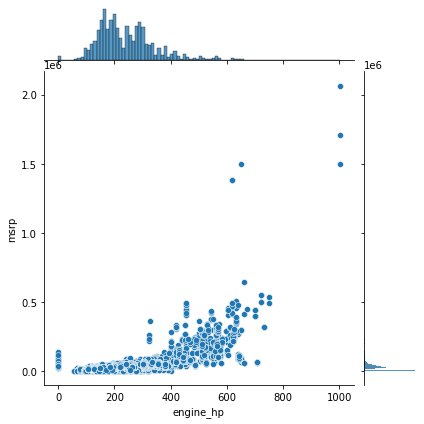

In [4]:

sns.jointplot(data=df, x="engine_hp", y="msrp")

In [8]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=40)
 

array([24572.86007354, 79451.62040141, 29458.29009549, ...,
       68885.11491753, 26222.74407322, 17667.18223752])

In [4]:

 
y_train = df_train.msrp.values
y_test = df_test.msrp.values
del df_train['msrp'] 
del df_test['msrp'] 

scaler = StandardScaler()
scaler.fit(df_train)

df_train = pd.DataFrame(scaler.transform(df_train), index=df_train.index, columns=df_train.columns)
df_test = pd.DataFrame(scaler.transform(df_test), index=df_test.index, columns=df_test.columns)

X_test = df_test.values 
X_train = df_train.values  
y_test

array([28515, 79645, 27995, ..., 58800, 24065, 16395])

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization) Ridge": Ridge(),
    " Linear Regression (L1 Regularization) Lasso": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(), 
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.") 
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))    

In [14]:
model = Ridge()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pred = model.predict(X_test)
df_pred = pd.DataFrame({ 'pred': pred, 'act': y_test, 'err': pred-y_test  })
df_pred

0.9687202248197432


,pred,act,err
0,23294.658361,28515,-5220.341639
1,82165.854744,79645,2520.854744
2,29368.287321,27995,1373.287321
3,1939.019558,2000,-60.980442
4,17962.015547,22495,-4532.984453
...,...,...,...
3927,33181.561450,30130,3051.561450
3928,21272.055832,21890,-617.944168
3929,63530.853970,58800,4730.853970
3930,26459.376791,24065,2394.376791


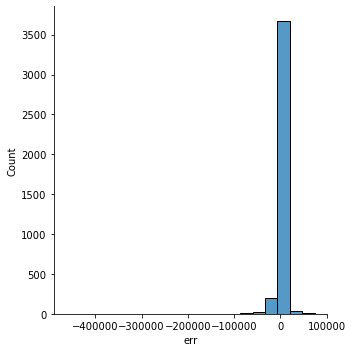

In [21]:

sns.displot(df_pred, x="err", bins=20)

In [ ]:
def label_encoding:
    cat_data = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category', 'vehicle_size', 'vehicle_style']
    for col in cat_data:
        df[col] = df[col].fillna('')
    df = df.fillna(0)   
    labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
    for c in cat_data:
        df[c+'_cat'] = labelencoder.fit_transform(df[c])
        del df[c]
    df['age'] = 2017 - df['year']
    del df['year']
    for col in df.columns:
        df[col] = df[col].astype(int)
    df

In [ ]:
#sns.distplot(df.msrp, kde=False)

In [ ]:
#sns.distplot(df.msrp[df.msrp < 100000], kde=False)

In [ ]:
#log_price = np.log1p(df.msrp)
#sns.distplot(log_price, kde=False)

In [ ]:
#df.isnull().sum()

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=32)
y_train = df_train.msrp.values
y_test = df_test.msrp.values
del df_train['msrp'] 
del df_test['msrp']  
X_test = df_test.values 
X_train = df_train.values  
len(y_test)

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))    

In [ ]:
#X_train, y_train = make_regression(n_samples=2000, n_features=10, random_state=0, noise=4, bias=100.0)
model = LinearRegression() 
model.fit(X_train, y_train) 
model.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_train) 
r2 = r2_score(y_train, pred) 
print(f"R-squared (R2 ): {r2}") 

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.msrp.values
y_val = df_val.msrp.values
del df_train['msrp']
del df_val['msrp'] 
del df_test['msrp'] 

In [ ]:
df_test

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [ ]:
df_num = df_num.fillna(0)
df_num

In [ ]:
X_train = df_num.values 

In [ ]:
model = LinearRegression()
reg = model.fit(X_train, y_train) 
reg.intercept_

In [ ]:
y_pred = reg.predict()

In [ ]:
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='y')
plt.legend()